# Notebook file insted of main.py to illustrate the results of project 

c:\Users\mercy\anaconda3\envs\GANS\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


       1 st phase : 
enter 1 to use HOG (classical)
enter 2 to use BOW (classical)
enter 3 to use deep learning (not classical)
       2 nd phase : 
enter 1 to use 5 models using vgg
enter 2 to use siamese
model loaded to device cuda
this signature is for person A and it's  forged 


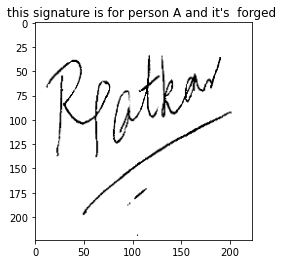

model loaded to device cuda
this signature is for person A and it's  real 


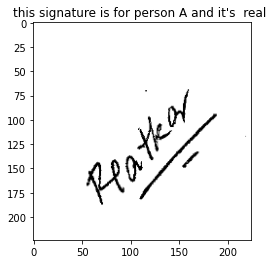

model loaded to device cuda
this signature is for person D and it's  real 


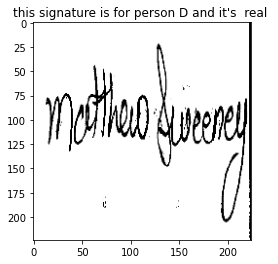

model loaded to device cuda
this signature is for person D and it's  real 


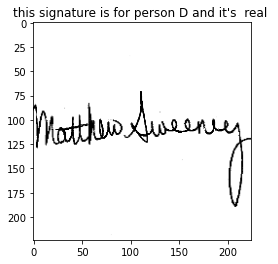

model loaded to device cuda
this signature is for person D and it's  real 


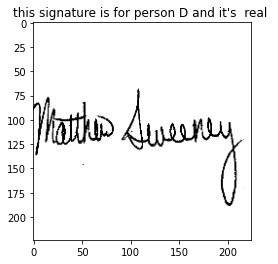

In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import inceptionArchitecture
import efficient
from skimage.feature import hog
import bagOfWords
import torch.nn.functional as F

import pandas as pd



import matplotlib.pyplot as plt
import cv2

import torch

from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader
import pickle

import vgg
import warnings

warnings.filterwarnings("ignore")
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def get_files(csv):
    data = pd.read_csv(csv)
    data["label"][data["label"] == "real"] = 0
    data["label"][data["label"] == "forged"] = 1
    person_files = list(data["image_name"])

    data["label"].astype(int)
    labels = list(data["label"])

    return person_files, labels


def printMessage(prediction, img):
    real_fake = ""
    if prediction[0].item() == 1:
        real_fake = "forged"

    else:
        real_fake = "real"

    persons = ["A", "B", "C", "D", "E"]
    print(f"this signature is for person {persons[phaseOnePrediction[0]]} and it's  {real_fake} ")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.title(f"this signature is for person {persons[phaseOnePrediction[0]]} and it's  {real_fake} ")
    plt.show()


# TestFiles
person_A_fileTest, labels_ATest = get_files("personA/Test/personA_SigVerificationTestLabels.csv")

phaseOneModel = pickle.load(open("LogisticRegression_mohamed.sav", "rb"))
dir = "SignatureTestSamples"


class sport():
    def __init__(self, file_list, dir, labels, mode='train', transform=None):
        self.file_list = file_list
        self.labels = labels
        self.dir = dir
        self.mode = mode
        self.transform = transform
        if self.mode == 'train':
            self.label = self.labels[0]

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx]))
        # convert Image to grayscale
        img = img.convert("L")

        if self.transform:
            img = self.transform(img)
        if self.mode == 'train':
            img = img.numpy()
            return img.astype('float32'), self.labels[idx]
        else:
            img = img.numpy()
            return img.astype('float32'), self.file_list[idx]


data_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor()

])

paths = os.listdir(dir)


def testModel(testLoader):
    model.eval()
    with torch.no_grad():
        correct = 0
        samples = 0
        for idx, (images, labels) in enumerate(testLoader):
            images = images.to(device=device)
            labels = labels.to(device=device)
            outputs = model(images)
            _, preds = outputs.max(1)
        return preds


def efficienttest(path):
    model.eval()
    data_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    with torch.no_grad():
        img = Image.open(path)
        img = data_transform(img)
        outputs = model(img.unsqueeze(0))
        _, preds = outputs.max(1)

        return preds


print("       1 st phase : ")
print("enter 1 to use HOG (classical)")
print("enter 2 to use BOW (classical)")
print("enter 3 to use deep learning (not classical)")

which = input("your choice :) :")
while which != '1' and which != '2' and which != '3':
    which = input("your choice :) :")

print("       2 nd phase : ")
print("enter 1 to use 5 models using vgg")
print("enter 2 to use siamese")
which2 = input("your choice :) :")
while which2 != '1' and which2 != '2':
    which2 = input("your choice :) :")

if which2 == '1':
    for i in paths:
        imgpath = os.path.join(dir, i)
        img_data = cv2.imread(imgpath, 0)
        img_data = cv2.resize(img_data, (224, 224))

        fd, hog_img = hog(img_data, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,
                          multichannel=False)
        fd = fd.reshape(1, -1)
        phaseOnePrediction = 0
        if which == '1':
            phaseOnePrediction = phaseOneModel.predict(fd)
        elif which == '2':
            phaseOnePrediction = bagOfWords.bow(imgpath)
        elif which == '5':
            phaseOnePrediction = []
            model = efficient.efficient_model()
            phaseOnePrediction.append(efficienttest(imgpath))




        model = vgg.vgg_model(phaseOnePrediction[0], path="vgg13bn/")
        imgList = []
        imgList.append(i)
        # print(i)
        person = sport(imgList, dir, [0], "train", transform=data_transform)
        dataloaderA = DataLoader(person, batch_size=32, shuffle=False)
        prediction = testModel(dataloaderA)
        printMessage(prediction, img_data)


else:

    for i in paths:
        imgpath = os.path.join(dir, i)
        img_data = cv2.imread(imgpath, 0)
        img_data = cv2.resize(img_data, (224, 224))

        fd, hog_img = hog(img_data, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True,
                          multichannel=False)
        fd = fd.reshape(1, -1)
        phaseOnePrediction = 0
        if which == '1':
            phaseOnePrediction = phaseOneModel.predict(fd)
        elif which == '2':
            phaseOnePrediction = bagOfWords.bow(imgpath)
        else:
            phaseOnePrediction = []
            model = efficient.efficient_model()
            phaseOnePrediction.append(efficienttest(imgpath))

        path = "ground_trueses"
        ground_truth = 0
        if phaseOnePrediction == 0:
            ground_truth = ("personA_41.png")
        if phaseOnePrediction == 1:
            ground_truth = ("personB_41.png")
        if phaseOnePrediction == 2:
            ground_truth = ("personC_41.png")
        if phaseOnePrediction == 3:
            ground_truth = ("personD_40.png")
        if phaseOnePrediction == 4:
            ground_truth = ("personE_41.png")

        # imgpath = os.path.join(dir, i)
        # img_data2 = cv2.imread(ground_truth, 0)
        # img_data2 = cv2.resize(img_data, (299, 299))
        model = inceptionArchitecture.model
        model.to(device)
        imgList = []
        imgList.append(i)
        # print(i)
        person = sport(imgList, dir, [0], "train", transform=data_transform)
        person2 = sport([ground_truth], "ground_trueses", [0], "train", transform=data_transform)
        dataloadertest = DataLoader(person, batch_size=32, shuffle=False)
        dataloaderground = DataLoader(person2, batch_size=32, shuffle=False)
        img1 = None
        img2 = None
        for imgs, labels in dataloadertest:
            img1 = imgs.to(device)
        for imgs, labels in dataloaderground:
            img2 = imgs.to(device)

        output1, output2 = model(img1, img2)
        euclidean_distance = F.pairwise_distance(output1, output2)
        print(f"distance = {euclidean_distance}")
        if euclidean_distance > 5:
            print("fake")

        else:
            print("real")
